In [34]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1, cache=True)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

mnist

In [35]:
x,y = mnist["data"], mnist["target"]
x.shape

(70000, 784)

In [36]:
y.shape

(70000,)

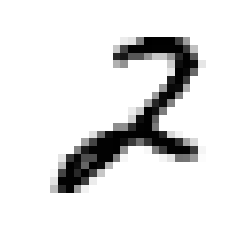

In [37]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = x[36001]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [38]:
y[36001]

'2'

In [41]:
x_train = x[:60000]
x_test = x[60000:]
y_train = y[:60000]
y_test = y[60000:]

In [49]:
import numpy as np
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

In [50]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [51]:
print(y_test_5)

[False False False ... False  True False]


In [52]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [53]:
sgd_clf.predict([some_digit])

array([False])

In [54]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(x_train, y_train_5):
    clone_clf = clone(sgd_clf)
    x_train_folds = x_train[train_index]
    y_train_folds = (y_train_5[train_index])
    x_test_folds = x_train[train_index]
    y_test_folds = (y_train_5[train_index])
    
    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

0.958
0.967875
0.935525


In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.9581 , 0.96665, 0.92695])

In [56]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [57]:
never_5_clf = Never5Classifier()

In [58]:
cross_val_score(never_5_clf, x_train, y_train_5, cv=3, scoring="accuracy")

array([0.9092 , 0.91155, 0.9082 ])

In [59]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[52656,  1923],
       [ 1043,  4378]])

In [61]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

NameError: name 'y_train_perfect_predictions' is not defined

In [62]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)

0.6948103475638787

In [63]:
recall_score(y_train_5, y_train_pred)

0.8076000737871242

In [64]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7469715065688449

In [65]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-455789.81216235])

In [66]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [67]:
y_some_digit_pred

array([False])

In [68]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)

In [69]:
y_some_digit_pred


array([False])

In [70]:
y_scores = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3, method="decision_function")

In [71]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

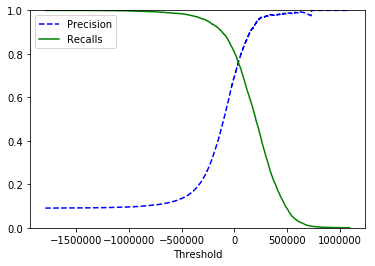

In [72]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1],"b--", label="Precision")
    plt.plot(thresholds, recalls[:-1],"g-", label="Recalls")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [73]:
y_train_pred_90 = (y_scores > 70000)

In [74]:
precision_score(y_train_5, y_train_pred_90)

0.8068134607395098

In [75]:
recall_score(y_train_5, y_train_pred_90)

0.7164729754657813

In [76]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [79]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

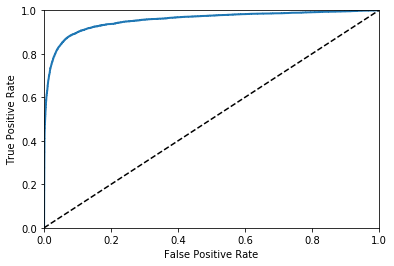

In [80]:
plot_roc_curve(fpr, tpr)
plt.show()

In [81]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9551616409539075

In [82]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3, method="predict_proba")

/home/guillaume/ADA/env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/guillaume/ADA/env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/guillaume/ADA/env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [83]:
y_scores_forest = y_probas_forest[:,-1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

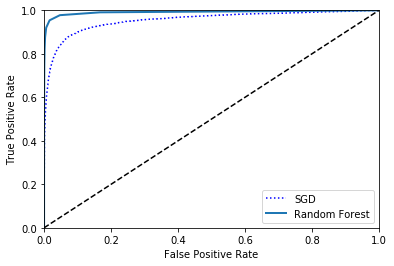

In [84]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [85]:
roc_auc_score(y_train_5, y_scores_forest)

0.9916777130536711

In [86]:
sgd_clf.fit(x_train, y_train)
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [90]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-728537.03511662, -286961.09535296,   44955.50358141,
         109826.88419418, -588427.06031229, -455789.81216235,
        -653802.04208799, -919319.59256883,  -25890.7534227 ,
        -931951.24477644]])

In [91]:
np.argmax(some_digit_scores)

3

In [92]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [93]:
sgd_clf.classes_[3]

'3'

In [94]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(x_train, y_train)
ovo_clf.predict([some_digit])

/home/guillaume/ADA/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/guillaume/ADA/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/guillaume/ADA/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset

/home/guillaume/ADA/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/guillaume/ADA/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/guillaume/ADA/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset

/home/guillaume/ADA/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/home/guillaume/ADA/env/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array(['2'], dtype=object)

In [95]:
len(ovo_clf.estimators_)

45

In [96]:
forest_clf.fit(x_train, y_train)
forest_clf.predict([some_digit])

/home/guillaume/ADA/env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array(['2'], dtype=object)

In [97]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]])

In [98]:
cross_val_score(sgd_clf, x_train, y_train, cv=3, scoring="accuracy")

array([0.86782643, 0.86474324, 0.85612842])

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))


In [100]:
cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90771846, 0.90964548, 0.91178677])

In [101]:
y_train_pred = cross_val_predict(sgd_clf, x_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5723,    3,   30,   12,   10,   46,   48,    8,   38,    5],
       [   2, 6487,   43,   25,    5,   40,    6,   10,  110,   14],
       [  54,   38, 5340,  101,   82,   23,   95,   53,  157,   15],
       [  46,   40,  128, 5352,    2,  241,   37,   58,  128,   99],
       [  13,   25,   43,   12, 5346,   11,   50,   32,   89,  221],
       [  69,   38,   37,  185,   78, 4607,  112,   28,  164,  103],
       [  27,   22,   50,    2,   40,   92, 5634,    6,   45,    0],
       [  23,   24,   63,   25,   46,   12,    3, 5813,   16,  240],
       [  49,  160,   68,  168,   16,  157,   56,   25, 5000,  152],
       [  41,   32,   31,   86,  154,   39,    2,  209,   74, 5281]])

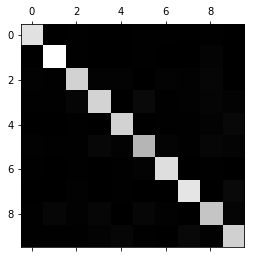

In [102]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [103]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

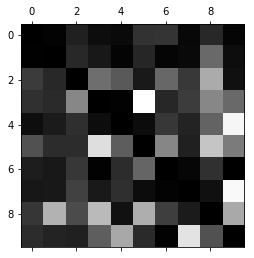

In [104]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [128]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype(int) % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [130]:
knn_clf.predict([some_digit])

array([[False, False]])

In [132]:
y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")

0.9688908367344913

In [133]:
noise = np.random.randint(0, 100, (len(x_train), 784))
x_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784))
x_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

In [134]:
knn_clf.fit(x_train_mod, y_train_mod)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [137]:
clean_digit = knn_clf.predict([x_test_mod[9999]])

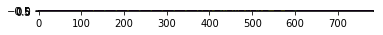

In [141]:
plt.imshow(clean_digit)
plt.show()

In [142]:
plot_digit(clean_digit)

NameError: name 'plot_digit' is not defined

In [ ]:
+